# Spectroscopic overlaps
__Date:__ February 14, 2024

Calculate spectroscopic overlaps using the SRG and compare to VMC overlaps.

_Last update:_ February 14, 2024

In [1]:
# Python imports
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Imports from scripts
from scripts.figures import (
    label_kvnn, label_nlj_state, label_nucleus, set_rc_parameters
)
from scripts.tools import convert_number_to_string
from test_spectroscopic_overlaps import (
    SingleParticleState, compute_normalization, load_overlap
)

### Set-up

In [3]:
def label_potential_lambda(kvnn, lamb):
    """Label for potential and SRG \lambda."""
    
    kvnn_label = label_kvnn(kvnn)
    lamb_label = rf"$({convert_number_to_string(lamb)})$"
    
    return kvnn_label + lamb_label

In [4]:
# Run this cell to turn on customized matplotlib graphics
set_rc_parameters()

## Contributions to the spectroscopic overlap

In [5]:
def overlap_contributions(
    nucleus_name, alpha, kvnn, lamb, x_limits=(0.0,6.0), y_limits=(9e-6,1e3), 
    print_normalization=False
):
    """Plots the overlap showing I and \delta U^\dagger in addition to their
    sum.
    """
    
    # Initialize figure
    plt.close('all')
    f, ax = plt.subplots(figsize=(4, 4))

    # Load data from file
    q_array, q_weights, overlap_array, ipm_array, delU_array, delU_errors = (
        load_overlap(nucleus_name, alpha, kvnn, lamb))
    
    # Print normalization?
    if print_normalization:

        total_norm = compute_normalization(q_array, q_weights, overlap_array)
        print(f"Total normalization = {total_norm}.")
        
        ipm_norm = compute_normalization(q_array, q_weights, ipm_array)
        print(f"IPM normalization = {ipm_norm}.")
        
        delUdag_norm = compute_normalization(q_array, q_weights, delU_array)
        print(f"\delta U^\dagger normalization = {delUdag_norm}.")

    # Add to plot
    ax.semilogy(q_array, overlap_array, color='black', label='Total',
                linewidth=2.0, zorder=1)
    ax.semilogy(q_array, ipm_array, color='blue', label='IPM',
                linestyle='dotted', linewidth=2.0, zorder=2)
    ax.semilogy(
        q_array, np.abs(delU_array), color='green',
        label=r'$|\delta U^\dagger|$', linestyle='dashed', linewidth=2.0,
        zorder=3
    )
    
    # Set axes limits
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

    # Set axes labels
    ax.set_xlabel(r"$q$ [fm" + r'$^{-1}$' + ']', fontsize=16)
    ax.set_ylabel(r"$A(q)$ [fm" + r'$^{3/2}$' + ']', fontsize=16)

    # Set legend
    ax.legend(loc='upper right', fontsize=14, frameon=False)

    # Add nucleus label
    ax.add_artist(
        AnchoredText(label_nucleus(nucleus_name), loc='lower left',
                     prop=dict(size=18), frameon=False)
    )
    
    # Add \alpha label
    if alpha.m_t == 1/2:
        alpha_label = 'proton '
    elif alpha.m_t == -1/2:
        alpha_label = 'neutron '
    alpha_label += label_nlj_state(alpha.n, alpha.l, alpha.j)
    ax.add_artist(
        AnchoredText(alpha_label, loc='center right', prop=dict(size=18),
                     frameon=False)
    )
    
    # Add potential and \lambda title
    ax.set_title(label_potential_lambda(kvnn, lamb), fontsize=16);

In [6]:
kvnn = 6
lamb = 1.5

Total normalization = 4.07123628293673e-07.
IPM normalization = 0.0.
\delta U^\dagger normalization = 4.07123628293673e-07.


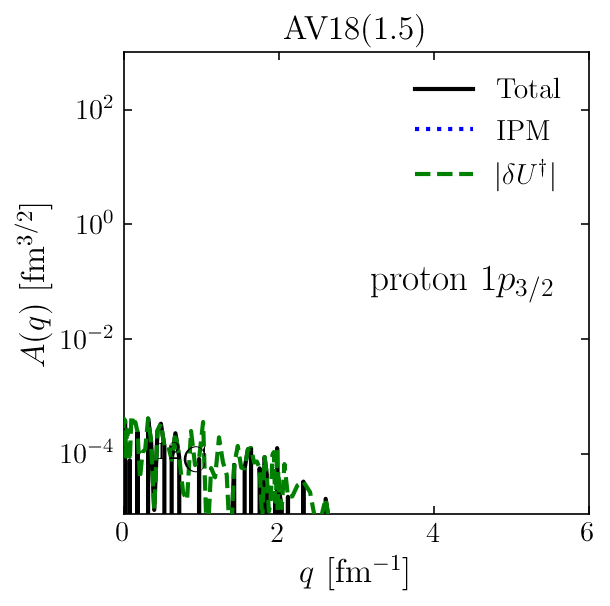

In [7]:
nucleus_name = 'C12'

alpha = SingleParticleState(1, 1, 3/2, 3/2, 1/2)  # Proton 1p_3/2 

overlap_contributions(
    nucleus_name, alpha, kvnn, lamb, x_limits=(0.0,6.0), y_limits=(9e-6,1e3), 
    print_normalization=True
)